# Portfolio Price Analytics

This iPython notebook serves to provide simple yet important stock price insights using stock portfolio history data from the excel file located in the same directory. It imports real-time stock data using the yahoo-finance python module.  
https://pypi.python.org/pypi/yahoo-finance  

In [207]:
import pandas as pd
import yahoo_finance
import matplotlib.pyplot as plt # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
#pylab.rcParams['figure.figsize'] = (12, 6)   # Change the size of plots
import seaborn as sns
sns.set(color_codes=True)

Populating the interactive namespace from numpy and matplotlib


In [208]:
#import data from portfolio.xlsx
raw_data = pandas.read_excel('portfolio.xlsx')
stock_data = raw_data.set_index("stock")
stock_data

,price-paid,quantity
stock,,
BAC,25.35,3
SNAP,25.09,4
TWTR,18.15,1
PSO,6.00,5
AMD,9.00,4


In [209]:
shares = [yahoo_finance.Share(str(stock)) for stock in stock_data.index]
current_prices = [share.get_price() for share in shares]
print (current_prices)

['23.1901', '23.13', '14.93', '7.90', '13.79']


In [210]:
df2 = pd.DataFrame({'price-paid' : stock_data['price-paid'], 
                    'current-price': [float(price) for price in current_prices],
                    'quantity' : stock_data['quantity']
                    })

price_differentials = [(x - y) for x, y in zip(df2['current-price'], df2['price-paid'])]
df2.insert(0, 'stock', stock_data.index)
df2.insert(3, 'price-diff', price_differentials)
df2.insert(5, 'profit', stock_data['quantity'] * df2['price-diff'])
df3 = df2.set_index('stock')
df3

,current-price,price-paid,price-diff,quantity,profit
stock,,,,,
BAC,23.1901,25.35,-2.1599,3,-6.4797
SNAP,23.1300,25.09,-1.9600,4,-7.8400
TWTR,14.9300,18.15,-3.2200,1,-3.2200
PSO,7.9000,6.00,1.9000,5,9.5000
AMD,13.7900,9.00,4.7900,4,19.1600


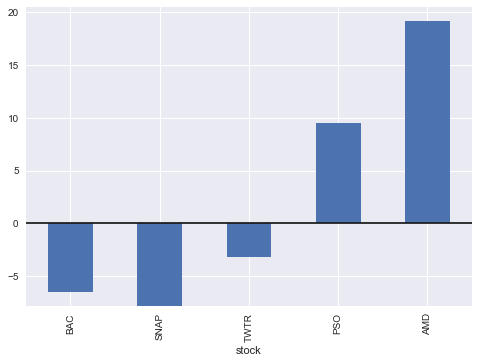

In [211]:
df3['profit'].plot(kind='bar'); plt.axhline(0, color='k')

In [234]:
for stock in df3.index:
    if (df3.at[str(stock), 'profit'] > 0): 
        print (stock)



PSO
AMD


In [194]:
# def refresh(): # get updated prices
#     shares = [yahoo_finance.Share(str(stock)) for stock in stock_data.index]
#     r = [share.refresh() for share in shares]
#     current_prices = [share.get_price() for share in r]
#     return current_prices

# print (refresh())